In [1]:
import os
from dotenv import load_dotenv
from openai import OpenAI
from IPython.display import Markdown, display, update_display

In [2]:
load_dotenv(override=True)
openai_api_key = os.getenv('OPENAI_API_KEY')
deepseek_api_key = os.getenv('DEEPSEEK_API_KEY')


if openai_api_key:
    print(f"OpenAI API Key exists and begins {openai_api_key[:10]}")
else:
    print("OpenAI API Key not set")

if deepseek_api_key:
    print(f"Deepseek API Key exists and begins {deepseek_api_key[:10]}")
else:
    print("Deepseek API Key not set")

OpenAI API Key exists and begins sk-proj-_u
Deepseek API Key exists and begins sk-2eb17e5


In [3]:
# Connect to OpenAI, Deepseek
openai = OpenAI()

deepseek_via_openai_client = OpenAI(
    api_key=deepseek_api_key, 
    base_url="https://api.deepseek.com"
)

In [6]:
system_message = "You are a smart vocabulary tutor.you can speak Chinese and English.When a user inputs a word, respond concisely with: clear and simple meaning; if applicable, break it down; a visual or word association; real-life usage; related words and collocations. Keep it short, engaging, and easy to remember."

In [8]:
# We have to write that function handle_tool_call:

def handle_tool_call(message):
    tool_call = message.tool_calls[0]
    arguments = json.loads(tool_call.function.arguments)
    city = arguments.get('destination_city')
    price = get_ticket_price(city)
    response = {
        "role": "tool",
        "content": json.dumps({"destination_city": city,"price": price}),
        "tool_call_id": tool_call.id
    }
    return response, city

In [9]:
# Some imports for handling images

import base64
from io import BytesIO
from PIL import Image

In [16]:
def artist(word):
    image_response = openai.images.generate(
            model="dall-e-3",
            prompt=f"An image representing the word {word} in a Sketch style. The scene includes a definition, a fun visual memory trick, all creatively illustrated.  Sketch style",
            size="1024x1024",
            n=1,
            response_format="b64_json",
        )
    image_base64 = image_response.data[0].b64_json
    image_data = base64.b64decode(image_base64)
    return Image.open(BytesIO(image_data))

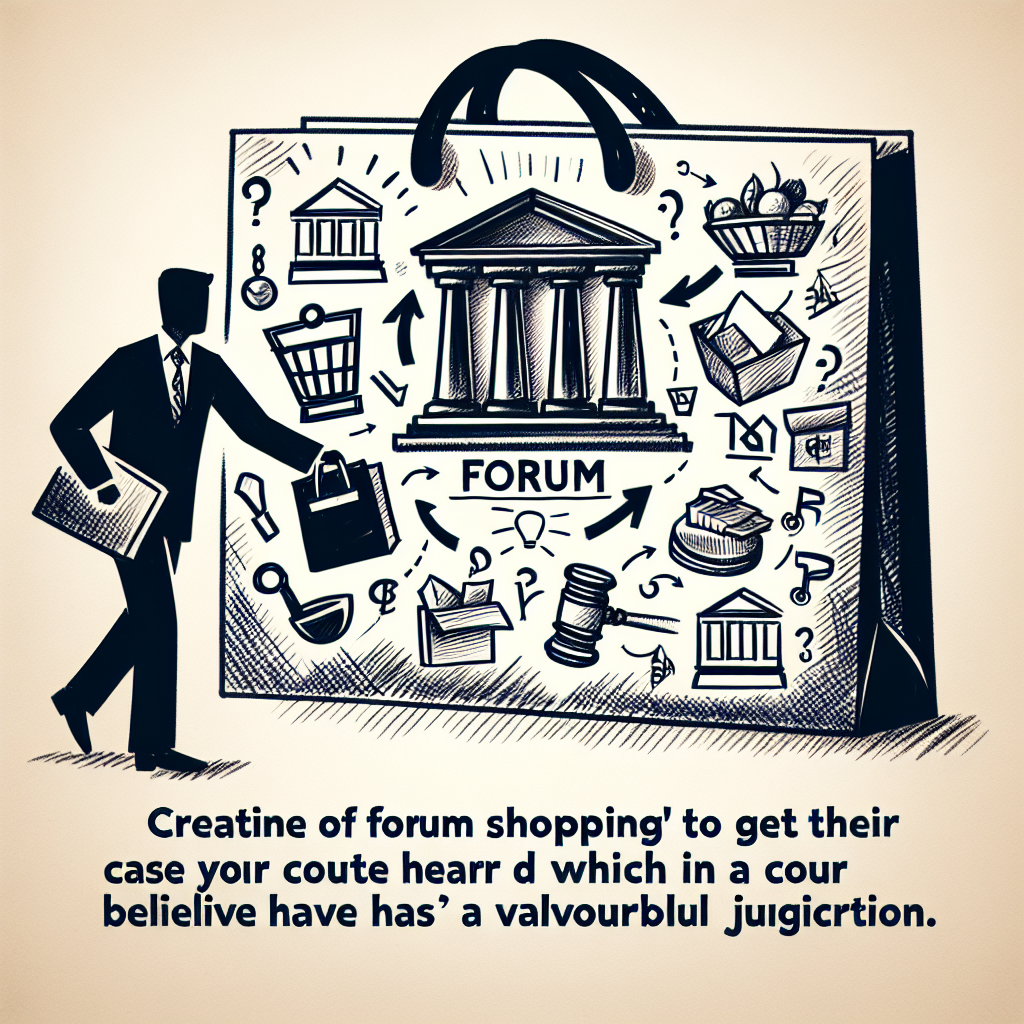

In [17]:
image = artist("forum shopping")
display(image)

In [18]:
import base64
from io import BytesIO
from PIL import Image
from IPython.display import Audio, display

def talker(message):
    response = openai.audio.speech.create(
        model="tts-1",
        voice="onyx",
        input=message)

    audio_stream = BytesIO(response.content)
    output_filename = "output_audio.mp3"
    with open(output_filename, "wb") as f:
        f.write(audio_stream.read())

    # Play the generated audio
    display(Audio(output_filename, autoplay=True))